In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [6]:
null=train.isnull().sum().sort_values(ascending=False)
null[null>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [7]:
total_rows = 1460
miss_per=pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

,Missing,Missing%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [8]:
null2=test.isnull().sum().sort_values(ascending=False)
null2[null2>0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

In [9]:
total_rows=1460
miss_per=pd.DataFrame(null2[null2>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

,Missing,Missing%
PoolQC,1456,99.73
MiscFeature,1408,96.44
Alley,1352,92.60
Fence,1169,80.07
FireplaceQu,730,50.00
LotFrontage,227,15.55
GarageYrBlt,78,5.34
GarageQual,78,5.34
GarageFinish,78,5.34
GarageCond,78,5.34


In [10]:
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)

In [11]:
train.shape,test.shape

((1460, 76), (1459, 75))

In [12]:
null=train.isnull().sum().sort_values(ascending=False)
null[null>0]

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [13]:
null2=test.isnull().sum().sort_values(ascending=False)
null2[null2>0]

LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
KitchenQual       1
TotalBsmtSF       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
dtype: int64

In [14]:
train.LotFrontage.dtypes, test.LotFrontage.dtypes

(dtype('float64'), dtype('float64'))

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


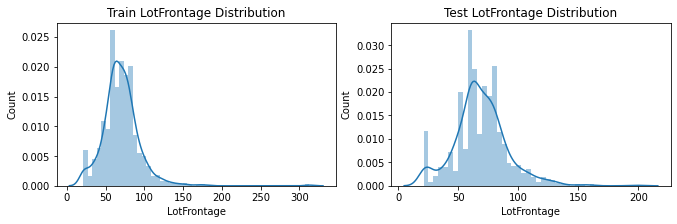

In [16]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(train['LotFrontage'])
plt.title('Train LotFrontage Distribution')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(test['LotFrontage'])
plt.title('Test LotFrontage Distribution')
plt.ylabel('Count')
plt.show()

In [17]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
test['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [19]:
train['LotFrontage'].fillna(65,inplace=True)
test['LotFrontage'].fillna(68,inplace=True)

In [20]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
test['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [22]:
train['GarageType'].fillna(method='ffill',inplace=True)
test['GarageType'].fillna(method='ffill',inplace=True)

In [23]:
train['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [24]:
test['GarageCond'].describe()

count     1381
unique       5
top         TA
freq      1328
Name: GarageCond, dtype: object

In [25]:
train['GarageCond'].fillna('TA',inplace=True)
test['GarageCond'].fillna('TA',inplace=True)

In [26]:
train['GarageYrBlt'].isnull().sum(),  test['GarageYrBlt'].isnull().sum()

(81, 78)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


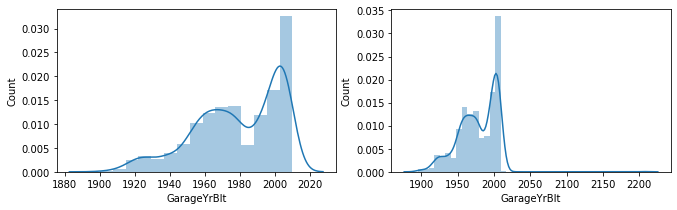

In [27]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(train['GarageYrBlt'])
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(test['GarageYrBlt'])
plt.ylabel('Count')
plt.show()

In [28]:
train['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [29]:
test['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [30]:
nan=train[train['GarageYrBlt'].isna()]
nan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,...,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,...,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,...,20,0,0,0,0,12,2008,WD,Normal,122000
1407,1408,20,RL,65.0,8780,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,9,2009,WD,Normal,136000


In [31]:
train.corr()['GarageYrBlt'].nlargest(3)

GarageYrBlt     1.000000
YearBuilt       0.825667
YearRemodAdd    0.642277
Name: GarageYrBlt, dtype: float64

In [32]:
test.corr()['GarageYrBlt'].nlargest(3)

GarageYrBlt     1.000000
YearBuilt       0.844150
YearRemodAdd    0.661765
Name: GarageYrBlt, dtype: float64

In [33]:
# Setting pandas to disaply all rows
pd.set_option('display.max_rows', None)

In [34]:
train[['GarageYrBlt','YearBuilt']][0:50]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
5,1993.0,1993
6,2004.0,2004
7,1973.0,1973
8,1931.0,1931
9,1939.0,1939


In [35]:
test[['GarageYrBlt','YearBuilt']][50:100]

,GarageYrBlt,YearBuilt
50,1966.0,1966
51,1967.0,1967
52,1964.0,1964
53,NaN,1962
54,1994.0,1952
55,1949.0,1949
56,1966.0,1966
57,1958.0,1958
58,2003.0,2003
59,1959.0,1959


In [36]:
train.drop('GarageYrBlt',axis=1,inplace=True)
# repeat the same operation on test data
test.drop('GarageYrBlt',axis=1,inplace=True)

In [37]:
train['GarageCond'].describe()

count     1460
unique       5
top         TA
freq      1407
Name: GarageCond, dtype: object

In [38]:
test['GarageCond'].describe()

count     1459
unique       5
top         TA
freq      1406
Name: GarageCond, dtype: object